# Water Challenge

In this project we aim to perform a clustering of mexican municipalities to better understand the different regions that exists within the country. 

First we will import our datasets and perform its relevant data integration.

In [1]:
import pandas as pd
import geopandas as gpd # For .shp and .geoJSON files
import matplotlib.pyplot as plt
import rasterio # For tiff datasets
from rasterio.plot import show
import pyogrio
from shapely.geometry import Point
import numpy as np

### División politica de México por municipios

Muestra 2471 poligonos que forman los municipios
En total, México se divide en 2477 unidades territoriales de segundo nivel que incluye a 16 demarcaciones territoriales de la Ciudad de México y 2461 municipios en los estados. 

Contiene: 
- Area
- Perímetro
- Nombre del municipio
- Geometria 

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,01008,01,008,San JosÃ© de Gracia,Aguascalientes,0,1,85779.057424,181537.599566,"POLYGON ((-102.35385 22.12064, -102.35426 22.1..."
1,01009,01,009,TepezalÃ¡,Aguascalientes,1,2,22966.101228,89329.531705,"POLYGON ((-102.16213 22.34851, -102.16149 22.3..."
2,01010,01,010,El Llano,Aguascalientes,2,3,50405.098875,144866.490025,"POLYGON ((-101.89778 21.95839, -101.89037 21.9..."
3,01011,01,011,San Francisco de los Romo,Aguascalientes,3,4,13777.017628,103689.065527,"POLYGON ((-102.14088 22.07534, -102.14086 22.0..."
4,01001,01,001,Aguascalientes,Aguascalientes,4,5,116635.924756,256631.025245,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."


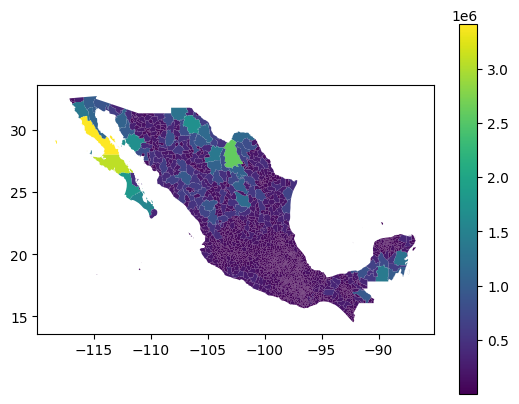

In [45]:
# Division política de México por municipios
municipios_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/mun22gw/mun22gw.shp'
municipios = gpd.read_file(municipios_path)
municipios.plot(column = 'AREA',legend = True)
municipios.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,01008,01,008,San JosÃ© de Gracia,Aguascalientes,0,1,85779.057424,181537.599566,"POLYGON ((-102.35385 22.12064, -102.35426 22.1..."
1,01009,01,009,TepezalÃ¡,Aguascalientes,1,2,22966.101228,89329.531705,"POLYGON ((-102.16213 22.34851, -102.16149 22.3..."
2,01010,01,010,El Llano,Aguascalientes,2,3,50405.098875,144866.490025,"POLYGON ((-101.89778 21.95839, -101.89037 21.9..."
3,01011,01,011,San Francisco de los Romo,Aguascalientes,3,4,13777.017628,103689.065527,"POLYGON ((-102.14088 22.07534, -102.14086 22.0..."
4,01001,01,001,Aguascalientes,Aguascalientes,4,5,116635.924756,256631.025245,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."


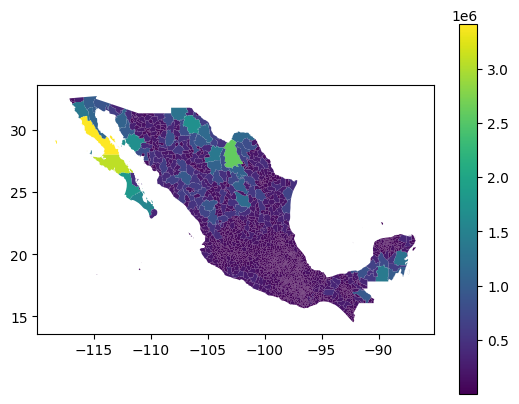

In [46]:
municipios2_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/mun22gw_c/mun22gw_c.shp'
municipios2 = gpd.read_file(municipios_path)
municipios2.plot(column = 'AREA',legend = True)
municipios2.head()

In [47]:
municipios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
municipios2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
municipios[['CVEGEO','AREA']]

,CVEGEO,AREA
0,01008,85779.057424
1,01009,22966.101228
2,01010,50405.098875
3,01011,13777.017628
4,01001,116635.924756
...,...,...
2470,32014,478381.878319
2471,32043,19747.810966
2472,32045,53912.296267
2473,32046,71692.148226


### Población por municipio
Contiene la poblacion total, masculina y femenina ademas de el total de viviendas habitadas en 2478 municipios.

In [7]:
# Population per municipality
poblacion_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/catun_municipio/AGEEML_2025414145400_utf.csv'
poblacion = pd.read_csv(poblacion_path)
poblacion['CVEGEO'] = poblacion['CVEGEO'].astype(str).str.zfill(5)
poblacion.replace('-',None,inplace=True)
poblacion[['POB_TOTAL', 'TOTAL DE VIVIENDAS HABITADAS']].corr()

,POB_TOTAL,TOTAL DE VIVIENDAS HABITADAS
POB_TOTAL,1.000000,0.997392
TOTAL DE VIVIENDAS HABITADAS,0.997392,1.000000


In [8]:
poblacion[['CVEGEO','NOM_ENT','NOM_MUN', 'POB_TOTAL']]

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL
0,01001,Aguascalientes,Aguascalientes,948990
1,01002,Aguascalientes,Asientos,51536
2,01003,Aguascalientes,Calvillo,58250
3,01004,Aguascalientes,Cosío,17000
4,01005,Aguascalientes,Jesús María,129929
...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446
2474,32055,Zacatecas,Villanueva,31558
2475,32056,Zacatecas,Zacatecas,149607
2476,32057,Zacatecas,Trancoso,20455


### Información geoespacial sobre la gestión municipal de los servicios de agua y saneamiento


Representación geoespacial de los elementos involucrados en la prestación de los servicios municipales de agua y saneamiento como resultado de los datos obtenidos durante el levantamiento del Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México durante el año 2021. Este producto contiene información digital estructurada en formato vectorial, la cual esta codificada de acuerdo con el Diccionario de datos de la gestión municipal de los servicios de agua y saneamiento. Esta capa contiene los siguientes elementos: **Prestadores de servicios de agua potable**, **Obras de toma para captación de agua**, **Plantas de potabilización**, **Puntos de descarga de aguas residuales municipales sin tratamiento** y **Plantas de tratamiento de aguas residuales**, 

con atributos como: 
- clave geográfica
- clave de entidad
- nombre de entidad
- clave municipio
- nombre de municipio
- tipo
- nombre del tipo
- latitud
- longitud
- origen de las coordenadas
- calificador de posición.

In [9]:
# Información geoespacial sobre la gestión municipal de los servicios de agua y saneamiento
servicios_agua_path = "/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/889463858560_s/conjunto_de_datos/cngmd_2021_m5_agua_potable_y_saneamiento.shp"
servicios_agua = gpd.read_file(servicios_agua_path)
servicios_agua['CVEGEO'] = servicios_agua['cve_ent'].astype(str).str.zfill(2) + servicios_agua['cve_mun'].astype(str).str.zfill(3)

In [10]:
servicios_agua.head()

,cve_geo,cve_ent,nom_ent,cve_mun,nom_mun,tipo,nom_tipo,latitud,longitud,orig_coord,cali_pos,geometry,CVEGEO
0,01001001AR,01,Aguascalientes,001,Aguascalientes,Punto de descarga,AGOSTADERITO,21.756500,-102.347167,Campo,Definida,POINT (-102.34717 21.7565),01001
1,01001001FC,01,Aguascalientes,001,Aguascalientes,Obra de toma para la captación de agua,P-001,21.882885,-102.312235,Gabinete,Definida,POINT (-102.31224 21.88288),01001
2,01001001PA,01,Aguascalientes,001,Aguascalientes,Prestador de Servicio de agua potable,CONCESIONARIA PROACTIVA MEDIO AMBIENTE CAASA,21.800250,-102.288722,Campo,Definida,POINT (-102.28872 21.80025),01001
3,01001001PT,01,Aguascalientes,001,Aguascalientes,Planta de tratamiento,PARQUE MEXICO,21.905333,-102.265861,Campo,Definida,POINT (-102.26586 21.90533),01001
4,01001002FC,01,Aguascalientes,001,Aguascalientes,Obra de toma para la captación de agua,P-002,21.882361,-102.315472,Campo,Definida,POINT (-102.31547 21.88236),01001


<Axes: >

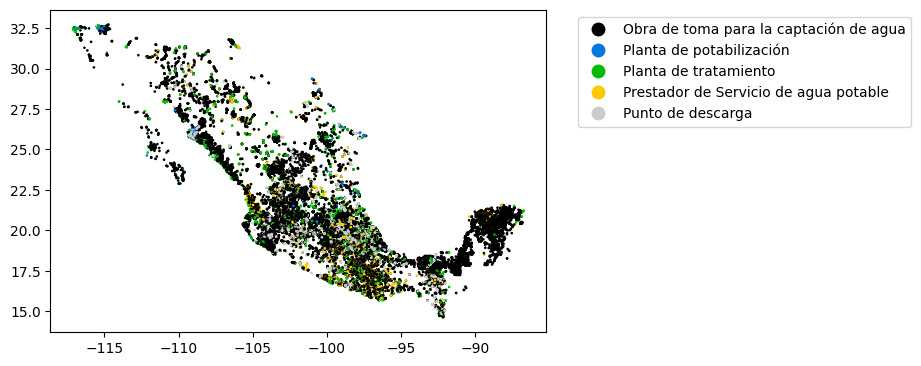

In [11]:
servicios_agua.plot(column='tipo',legend= True, markersize = 0.8,cmap = 'nipy_spectral', legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})

In [12]:
list(servicios_agua['tipo'].unique())

['Punto de descarga',
 'Obra de toma para la captación de agua',
 'Prestador de Servicio de agua potable',
 'Planta de tratamiento',
 'Planta de potabilización']

In [13]:
tipos = list(servicios_agua['tipo'].unique())
columnas_agua = ['agua_AR','agua_FC','agua_PA','agua_PT', 'agua_PP']
servicios_agua_mun = poblacion[['CVEGEO','NOM_ENT','NOM_MUN']].copy()
servicios_agua_mun.set_index('CVEGEO',inplace=True)
for i in range(len(tipos)):
    servicios_agua_mun[columnas_agua[i]] = servicios_agua[servicios_agua['tipo']==tipos[i]].groupby('CVEGEO').count()['tipo']
servicios_agua_mun.fillna(0,inplace=True)
servicios_agua_mun.reset_index(inplace=True)
for i in range(len(tipos)):
    print('Se encontraron', len(servicios_agua_mun[servicios_agua_mun[columnas_agua[i]]>0]), 'municipios con al menos 1', tipos[i])

Se encontraron 1490 municipios con al menos 1 Punto de descarga
Se encontraron 2431 municipios con al menos 1 Obra de toma para la captación de agua
Se encontraron 2356 municipios con al menos 1 Prestador de Servicio de agua potable
Se encontraron 1265 municipios con al menos 1 Planta de tratamiento
Se encontraron 232 municipios con al menos 1 Planta de potabilización


In [14]:
servicios_agua_mun

,CVEGEO,NOM_ENT,NOM_MUN,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP
0,01001,Aguascalientes,Aguascalientes,91.0,226.0,2.0,24.0,0.0
1,01002,Aguascalientes,Asientos,0.0,54.0,1.0,9.0,0.0
2,01003,Aguascalientes,Calvillo,7.0,43.0,1.0,4.0,0.0
3,01004,Aguascalientes,Cosío,10.0,13.0,1.0,3.0,0.0
4,01005,Aguascalientes,Jesús María,34.0,42.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,11.0,31.0,1.0,3.0,0.0
2474,32055,Zacatecas,Villanueva,4.0,10.0,1.0,2.0,0.0
2475,32056,Zacatecas,Zacatecas,5.0,22.0,1.0,2.0,0.0
2476,32057,Zacatecas,Trancoso,8.0,9.0,1.0,2.0,0.0


#### Resumen `servicios_agua_mun`
Contiene las cuantas instalaciones de **servicios de agua y saneamiento** tiene cada municipio
- `agua_AR` : Punto de descarga
- `agua_FC` : Obra de toma para la captación de agua
- `agua_PA` : Prestador de Servicio de agua potable
- `agua_PT` : Planta de tratamiento
- `agua_PP` : Planta de potabilización'

```
servicios_agua_mun[['CVEGEO','agua_AR', 'agua_FC', 'agua_PA', 'agua_PT', 'agua_PP']]
```

### Producción agricola estatal

Contiene información desde 1994 hasta 2022 sobre 113 indicadores usados en la agricultura como son: 
- 'Productores beneficiados por el PROCAMPO'
- 'Monto pagado por el PROCAMPO'
- 'Volumen de la producción forestal maderable'
- 'Cultivos anuales. Producción a cielo abierto. Soya'
- 'Cultivos perennes. Producción a cielo abierto. Uva'
- 'Cultivos anuales. Producción a cielo abierto. Arroz'
- 'Cultivos anuales. Producción a cielo abierto. Trigo grano'
- 'Cultivos anuales. Producción a cielo abierto. Frijol grano'
- 'Porcentaje de superficie agrícola por disponibilidad de agua. De riego'
- 'Porcentaje de superficie agrícola por disponibilidad de agua. De temporal'
- 'Valor de la producción forestal maderable. Coníferas'
- 'Volumen de la producción forestal maderable. Coníferas'
- 'Superficie beneficiada por el PROAGRO para actividades agrícolas'
- ... Entre otros

In [15]:
# Dataset of agricultural production by state
agriculture_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/agricultura_00_xlsx/agricultura_00.xlsx'
agriculture = pd.read_excel(agriculture_path, header=4)
agriculture


,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2019,2022,unidad_medida
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1009000050,Productores beneficiados por el PROCAMPO,3093693,2773270,2870064,2641249,...,2532795,2485725,2162314,2178538,1861844,1879590,1771182,NaN,NaN,No especificada
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1009000051,Monto pagado por el PROCAMPO,3620968,4709034,5441209,6623884,...,14423207,142041733,13042678,12796074,12058985,10520861,7168111,NaN,NaN,Miles de Pesos
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1009000075,Volumen de la producción forestal maderable,6223612,6743392,6384885,7024324,...,5589039,5951930,5913122,5648839,6161603,6879078,7355462,NaN,NaN,Metros cúbicos rollo
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1009000076,Volumen de la producción forestal maderable de...,5638413,5759522,5641091,5888371,...,4473681,4917123,4856505,4556867,4924536,5483338,5872403,NaN,NaN,Metros cúbicos rollo
4,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1009000077,Volumen de la producción forestal maderable de...,440497,773699,565128,889787,...,838612,750436,726800,760884,838786,930413,1041677,NaN,NaN,Metros cúbicos rollo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30622,32,Zacatecas,996,No especificado,1009000076,Volumen de la producción forestal maderable de...,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metros cúbicos rollo
30623,32,Zacatecas,997,Otros estados,1009000050,Productores beneficiados por el PROCAMPO,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,No especificada
30624,32,Zacatecas,997,Otros estados,1009000051,Monto pagado por el PROCAMPO,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Miles de Pesos
30625,32,Zacatecas,997,Otros estados,1009000075,Volumen de la producción forestal maderable,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metros cúbicos rollo


In [16]:
#agriculture['indicador'].unique()

### Exportaciones estatales

Contiene Valores totales y por 30 diferentes sectores de las Exportaciones Trimestrales por Entidad Federativa, desde el año 2007 hasta el 2024.

- Exportaciones totales
- Fabricación de insumos textiles y acabado de textiles
- ...
- Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza
- Agricultura
- Pesca, caza y captura


In [17]:
# Exports Dataset 
exports_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/etef_00_csv/conjunto_de_datos/etef_valor_00.csv'
exports = pd.read_csv(exports_path)
exports[['año', 'trimestre']] = exports['año'].str.split('/', expand=True)
exports

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida,trimestre
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6207095692,Exportaciones Trimestrales por Entidad Federat...,2007,51250250,Miles de Dólares,t1
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6207095692,Exportaciones Trimestrales por Entidad Federat...,2007,57823366,Miles de Dólares,t2
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6207095692,Exportaciones Trimestrales por Entidad Federat...,2007,62611002,Miles de Dólares,t3
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6207095692,Exportaciones Trimestrales por Entidad Federat...,2007,66125122,Miles de Dólares,t4
4,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6207095692,Exportaciones Trimestrales por Entidad Federat...,2008,62193381,Miles de Dólares,t1
...,...,...,...,...,...,...,...,...,...,...
5053,32,Zacatecas,0,Estatal,6207095719,Exportaciones anuales por entidad federativa. ...,2020,3346165,Miles de Dólares,None
5054,32,Zacatecas,0,Estatal,6207095719,Exportaciones anuales por entidad federativa. ...,2021,3850872,Miles de Dólares,None
5055,32,Zacatecas,0,Estatal,6207095719,Exportaciones anuales por entidad federativa. ...,2022,3585280,Miles de Dólares,None
5056,32,Zacatecas,0,Estatal,6207095719,Exportaciones anuales por entidad federativa. ...,2023,2833604,Miles de Dólares,None


In [18]:
import re
exp_ind = list(exports['indicador'].unique())
sentences = list()
for i in range(len(exp_ind)):
    item = re.split("\. ",str(exp_ind[i]))[1]
    # print('-',item)
    sentences.append(item)

len(sentences)


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_15286/3783862860.py:5: SyntaxWarning: invalid escape sequence '\.'
  item = re.split("\. ",str(exp_ind[i]))[1]


31

### Índice Nacional de Inundación

Es un índice que toma en cuenta parámetros hidrológicos como la precipitación acumulada, pendiente del terreno, acumulación de escurrimiento y retención máxima de humedad del suelo

Contiene las siguentes columnas:
- OBJECTID
- NOM_MUN
- OID_1
- CVE_MPIO
- IVI__ESTAD
- IVI__POB20
- UMBRAL12H
- IVI__VULNE
- MUNICIPIO
- UMBRAL
- AREAKMKM
- ÁREA_INUN
- PORCENTA_1
- PELIGRO_IN
- CLV
- SHAPE_AREA
- SHAPE_LEN
- geometry

,OBJECTID,NOM_MUN,OID_1,CVE_MPIO,IVI__ESTAD,IVI__POB20,UMBRAL12H,IVI__VULNE,MUNICIPIO,UMBRAL,AREAKMKM,ÁREA_INUN,PORCENTA_1,PELIGRO_IN,CLV,SHAPE_AREA,SHAPE_LEN,geometry
0,29,Ixtapan del Oro,29,15041,MEXICO,6629.0,69.05997,MUY BAJA,IXTAPAN DEL ORO,60.0,98.796902,1.232177,1.247182,Muy bajo,15041,9.879690e+07,58333.484045,"POLYGON ((2678224.263 815513.736, 2678258.321 ..."
1,30,Ixtlahuaca,30,15042,MEXICO,141482.0,50.74218,MEDIA,IXTLAHUACA,50.0,332.860308,35.975357,10.807944,Alto,15042,3.328603e+08,156763.147460,"POLYGON ((2722395.674 860933.409, 2722455.143 ..."
2,31,Xalatlaco,31,15043,MEXICO,26865.0,70.98399,MEDIA,JALATLACO,60.0,107.666712,1.679745,1.560134,Muy bajo,15043,1.076667e+08,49906.530848,"POLYGON ((2782449.809 804256.481, 2782528.638 ..."
3,32,Jilotepec,32,15045,MEXICO,83755.0,64.66266,MEDIA,JILOTEPEC,60.0,564.308632,26.216387,4.645753,Medio,15045,5.643086e+08,228170.124857,"POLYGON ((2743692.719 910597.603, 2743717.439 ..."
4,33,Jilotzingo,33,15046,MEXICO,17970.0,66.61413,MEDIA,JILOTZINGO,60.0,115.754349,0.210275,0.181656,Muy bajo,15046,1.157543e+08,53930.601313,"POLYGON ((2778032.733 842153.521, 2778051.068 ..."


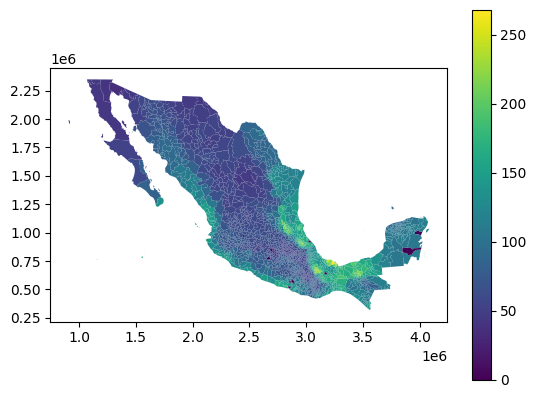

In [19]:
ind_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/Indice_de_peligro_por_inundacion/IndPel_Inundacion.shp'
inundabilidad = gpd.read_file(ind_path)
inundabilidad.plot(column= 'UMBRAL12H',legend=True)
inundabilidad.head()


In [62]:
len(inundabilidad)

2457

In [20]:
inundabilidad['CVEGEO'] = inundabilidad['CVE_MPIO'].astype(str).str.zfill(5)
inundabilidad[['CVEGEO','UMBRAL12H','PORCENTA_1']] # Umbral y porcentaje de inundabilidad

,CVEGEO,UMBRAL12H,PORCENTA_1
0,15041,69.05997,1.247182
1,15042,50.74218,10.807944
2,15043,70.98399,1.560134
3,15045,64.66266,4.645753
4,15046,66.61413,0.181656
...,...,...,...
2452,31101,100.22850,6.930963
2453,31036,102.42540,23.994856
2454,31056,105.68070,11.923813
2455,31028,95.99220,5.824085


#### Resumen `indundabilidad`
Contiene las columnas del Índice Nacional de Inundación

### Zonas Metropolitanas

Contiene informacion actualizada al 2020 sobre las zonas consideradas metropolitanas.

Indica: 
- TIPO_MET (Zona metropolitana, Metrópoli municipal, Zona conurbada)

**Definicion**:
- 'Zona metropolitana': Conjunto de municipios cuya
relación se basa en un alto
grado de integración física
o funcional intermunicipal
o interestatal y la población
total de los municipios que
la conforman es de 200 mil
habitantes o más. La localidad
urbana o conurbación que da
origen a la zona metropolitana
cuenta con 100 mil habitantes
o más.
- 'Metrópoli municipal': Municipio que no forma parte
de una zona metropolitana,
sin embargo, cuenta con
una población total de 300
mil habitantes o más y es
económica o políticamente
relevante para el estado. La
localidad urbana que da origen
a la metrópoli municipal cuenta
con 200 mil habitantes o más.
- 'Zona conurbada': Conjunto de municipios cuya
relación se basa en un alto
grado de integración física
o funcional intermunicipal o
interestatal. La localidad urbana
o conurbación que da origen a
la zona conurbada tiene entre
50 mil y 100 mil habitantes


**Encoding**: 
- 3 = Zona metropolitana
- 2 = Metrópoli municipal
- 1 = Zona conurbada
- 0 = ninguna de las anteriores

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,CVE_MET,NOM_MET,TIPO_MET,geometry
0,01001,01,001,Aguascalientes,01.1.01,Aguascalientes,Zona metropolitana,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01005,01,005,Jesús María,01.1.01,Aguascalientes,Zona metropolitana,"POLYGON ((2465526.729 1114740.466, 2465752.546..."
2,01011,01,011,San Francisco de los Romo,01.1.01,Aguascalientes,Zona metropolitana,"POLYGON ((2484320.207 1119000.073, 2484497.483..."
3,02001,02,001,Ensenada,02.2.02,Ensenada,Metrópoli municipal,"MULTIPOLYGON (((1208688.256 1871968.733, 12087..."
4,02002,02,002,Mexicali,02.2.03,Mexicali,Metrópoli municipal,"MULTIPOLYGON (((1302108.533 2042702.283, 13021..."


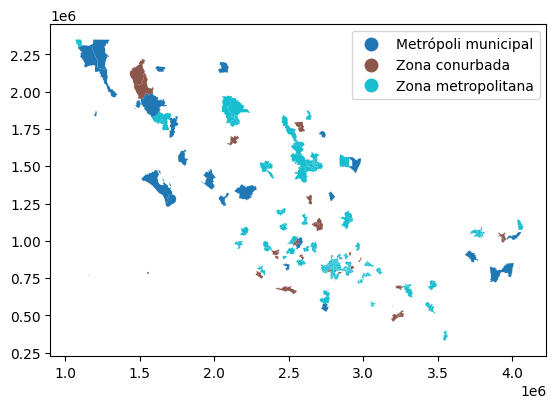

In [21]:
metropolis_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/Metropolis/Metropolis_2020.shp'
metropolis = gpd.read_file(metropolis_path)
metropolis.plot(column='TIPO_MET', legend= True)
metropolis.head()

In [22]:
m_tipos = metropolis['TIPO_MET'].unique()
i=3
for tipo in m_tipos:
    metropolis['urban'+str(i)] = np.where(metropolis['TIPO_MET']==tipo,i,0)
    i -= 1
metropolis['urban'] = np.sum(metropolis[['urban3','urban2','urban1']], axis=1)

In [23]:
metropolis[['CVEGEO','urban']]

,CVEGEO,urban
0,01001,3
1,01005,3
2,01011,3
3,02001,2
4,02002,2
...,...,...
416,32017,3
417,32032,3
418,32057,3
419,32050,3


### Ubicar zona donde se encuentra un punto

In [24]:
# Localize a point within a map
punto = Point(-99.16755375262784, 19.42714201512711)
municipios['NOM_ENT'][punto.within(municipios['geometry'])]

284    Ciudad de MÃ©xico
Name: NOM_ENT, dtype: object

### Poblacion y altutud de cada localidad de México

Contiene la poblacion total, masculina y femenina ademas de el total de viviendas habitadas y la altitud en 297036 localidades de México. 

In [102]:
# Altitud de cada localidad
altitud_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/altitud_poblacion_localidad/AGEEML_2025414942241_utf.csv'
altitud = pd.read_csv(altitud_path)
# Convert to GeoDataFrame using the decimal latitude/longitude columns
altitud = gpd.GeoDataFrame(
    altitud,
    geometry=gpd.points_from_xy(
        altitud['LON_DECIMAL'],  # Longitude (x coordinate)
        altitud['LAT_DECIMAL'],  # Latitude (y coordinate)
    ),
    crs="EPSG:4326"  # WGS84 coordinate reference system
)

In [103]:
altitud.head()

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,...,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS,geometry
0,10010001,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,1,AGUASCALIENTES,U,...,102°17´45.768 W,21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259,POINT (-102.29605 21.87982)
1,10010094,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,94,GRANJA ADELITA,R,...,102°22´24.710 W,21.871874,-102.373530,1901,F13D18,5,*,*,2,POINT (-102.37353 21.87187)
2,10010096,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,96,AGUA AZUL,R,...,102°21´25.639 W,21.883756,-102.357122,1861,F13D18,41,24,17,12,POINT (-102.35712 21.88376)
3,10010100,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,100,RANCHO ALEGRE,R,...,102°22´21.833 W,21.854683,-102.372731,1879,F13D18,0,0,0,0,POINT (-102.37273 21.85468)
4,10010102,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,102,LOS ARBOLITOS [RANCHO],R,...,102°21´26.261 W,21.780180,-102.357295,1861,F13D18,8,*,*,2,POINT (-102.3573 21.78018)


<Axes: >

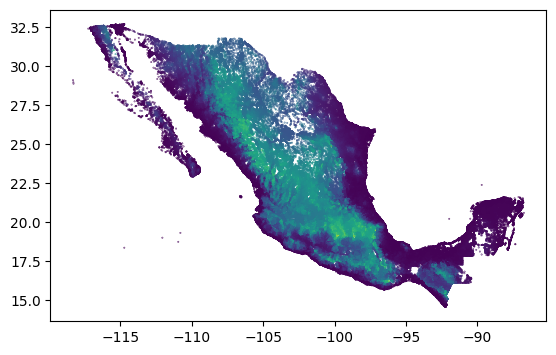

In [104]:
altitud.plot(column='ALTITUD',label=True, markersize=0.1)

In [105]:
print('Found ',len(altitud),' localities from ',len(municipios),' municipalities')
print('Average localities per municipality: ', len(altitud)/len(municipios))


Found  297036  localities from  2475  municipalities
Average localities per municipality:  120.01454545454546


In [106]:
# First, create a unique municipality identifier by combining CVE_ENT and CVE_MUN
altitud['CVEGEO'] = altitud['CVE_ENT'].astype(str).str.zfill(2) + altitud['CVE_MUN'].astype(str).str.zfill(3)


In [108]:

# Now group by this new identifier and calculate the average altitude
avg_altitude_by_municipality = altitud.groupby('CVEGEO').agg({
    'NOM_ENT': 'first',  # Keep the state name
    'NOM_MUN': 'first',  # Keep the municipality name
    'ALTITUD': 'mean'   # Calculate average altitude
}).reset_index()

In [109]:
avg_altitude_by_municipality

,CVEGEO,NOM_ENT,NOM_MUN,ALTITUD
0,01001,AGUASCALIENTES,AGUASCALIENTES,1918.046196
1,01002,AGUASCALIENTES,ASIENTOS,2030.520325
2,01003,AGUASCALIENTES,CALVILLO,1827.143813
3,01004,AGUASCALIENTES,COSÍO,1967.656566
4,01005,AGUASCALIENTES,JESÚS MARÍA,1936.513072
...,...,...,...,...
2473,32054,ZACATECAS,VILLA HIDALGO,2167.903226
2474,32055,ZACATECAS,VILLANUEVA,1962.535211
2475,32056,ZACATECAS,ZACATECAS,2263.314961
2476,32057,ZACATECAS,TRANCOSO,2136.738095


### Indice de Impacto humano
Archivo tif

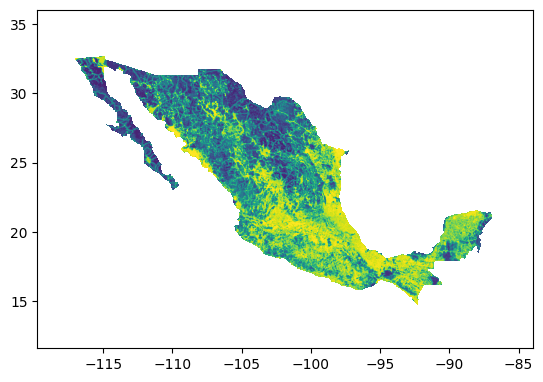

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [63]:
impacto_h_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/indihum14gw/indihum14gw.tif'
human_impact = rasterio.open(impacto_h_path)
show(human_impact)
human_impact.crs

In [64]:
municipios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [65]:
municipios2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
municipios2

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,01008,01,008,San JosÃ© de Gracia,Aguascalientes,0,1,85779.057424,181537.599566,"POLYGON ((-102.35385 22.12064, -102.35426 22.1..."
1,01009,01,009,TepezalÃ¡,Aguascalientes,1,2,22966.101228,89329.531705,"POLYGON ((-102.16213 22.34851, -102.16149 22.3..."
2,01010,01,010,El Llano,Aguascalientes,2,3,50405.098875,144866.490025,"POLYGON ((-101.89778 21.95839, -101.89037 21.9..."
3,01011,01,011,San Francisco de los Romo,Aguascalientes,3,4,13777.017628,103689.065527,"POLYGON ((-102.14088 22.07534, -102.14086 22.0..."
4,01001,01,001,Aguascalientes,Aguascalientes,4,5,116635.924756,256631.025245,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
...,...,...,...,...,...,...,...,...,...,...
2470,32014,32,014,General Francisco R. MurguÃ­a,Zacatecas,2470,2467,478381.878319,397050.472305,"POLYGON ((-102.89148 24.46084, -102.88558 24.4..."
2471,32043,32,043,SusticacÃ¡n,Zacatecas,2471,2468,19747.810966,90595.389397,"POLYGON ((-103.10931 22.57209, -103.11083 22.5..."
2472,32045,32,045,TepechitlÃ¡n,Zacatecas,2472,2469,53912.296267,147600.356437,"POLYGON ((-103.1586 21.63311, -103.15928 21.63..."
2473,32046,32,046,Tepetongo,Zacatecas,2473,2470,71692.148226,202202.709425,"POLYGON ((-103.10931 22.57209, -103.11007 22.5..."


In [66]:
human_impact.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [70]:
import rasterio
from rasterio.mask import mask
import numpy as np

# 3. Ensure both datasets are in the same CRS
municipios2 = municipios2.to_crs(human_impact.crs)

# 4. Prepare output dataframe
results = []

# 5. Process each municipality
for idx, row in municipios.iterrows():
    try:
        # Clip raster to municipality polygon
        out_image, out_transform = mask(
            human_impact,
            [row.geometry],
            crop=True,
            nodata=human_impact.nodata  # Handle no-data values
        )
        
        # Remove no-data values and flatten array
        data = out_image[0]  # First band
        valid_values = data[data != human_impact.nodata]
        
        if len(valid_values) > 0:
            avg_impact = np.mean(valid_values)
            std_impact = np.std(valid_values)
            pixel_count = len(valid_values)
        else:
            avg_impact = np.nan
            std_impact = np.nan
            pixel_count = 0
            
        results.append({
            'CVEGEO': row['CVEGEO'],
            'NOMGEO': row['NOMGEO'],
            'avg_impact': avg_impact,
            'std_impact': std_impact,
            'pixel_count': pixel_count
        })
        
    except Exception as e:
        print(f"Error processing {row['CVEGEO']}: {str(e)}")
        results.append({
            'CVEGEO': row['CVEGEO'],
            'NOMGEO': row['NOMGEO'],
            'avg_impact': np.nan,
            'std_impact': np.nan,
            'pixel_count': 0
        })

# 6. Create results dataframe and merge with original
results_df = pd.DataFrame(results)
municipios_with_impact = municipios.merge(results_df, on=['CVEGEO', 'NOMGEO'])

# 7. Save results
impacto_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/municipalities_with_impact2.shp'
municipios_with_impact.to_file(impacto_path)

/tmp/ipykernel_15286/345443820.py:59: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  municipios_with_impact.to_file(impacto_path)
/home/raqcoss/miniconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'pixel_count' to 'pixel_coun'
  ogr_write(


# Merge DataFrames 

In [76]:
avg_altitude_by_municipality.reset_index(inplace=True)
all_data = poblacion[['CVEGEO','NOM_ENT','NOM_MUN', 'POB_TOTAL']].merge(avg_altitude_by_municipality[['CVEGEO','ALTITUD']], on = 'CVEGEO',how='outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196
1,01002,Aguascalientes,Asientos,51536,2030.520325
2,01003,Aguascalientes,Calvillo,58250,1827.143813
3,01004,Aguascalientes,Cosío,17000,1967.656566
4,01005,Aguascalientes,Jesús María,129929,1936.513072
...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226
2474,32055,Zacatecas,Villanueva,31558,1962.535211
2475,32056,Zacatecas,Zacatecas,149607,2263.314961
2476,32057,Zacatecas,Trancoso,20455,2136.738095


In [77]:
all_data = all_data.merge(municipios[['CVEGEO','AREA']], on = 'CVEGEO', how='outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156
...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672


In [78]:
all_data = all_data.merge(inundabilidad[['CVEGEO','UMBRAL12H','PORCENTA_1']], on = 'CVEGEO',how='outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602
...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207


In [79]:
all_data = all_data.merge(metropolis[['CVEGEO','urban']], on = 'CVEGEO',how='outer')
all_data['urban'].fillna(0, inplace=True) #In this case, NaN are rural areas that anre not included in metropolis df, so urbanization level is 0.
all_data


/tmp/ipykernel_15286/1113561373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['urban'].fillna(0, inplace=True) #In this case, NaN are rural areas that anre not included in metropolis df, so urbanization level is 0.


,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056,3.0
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541,0.0
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972,0.0
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082,0.0
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602,3.0
...,...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430,0.0
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213,0.0
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201,3.0
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207,3.0


In [80]:
all_data = all_data.merge(servicios_agua_mun[['CVEGEO','agua_AR', 'agua_FC', 'agua_PA', 'agua_PT', 'agua_PP']],on='CVEGEO', how = 'outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056,3.0,91.0,226.0,2.0,24.0,0.0
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541,0.0,0.0,54.0,1.0,9.0,0.0
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972,0.0,7.0,43.0,1.0,4.0,0.0
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082,0.0,10.0,13.0,1.0,3.0,0.0
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602,3.0,34.0,42.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430,0.0,11.0,31.0,1.0,3.0,0.0
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213,0.0,4.0,10.0,1.0,2.0,0.0
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201,3.0,5.0,22.0,1.0,2.0,0.0
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207,3.0,8.0,9.0,1.0,2.0,0.0


In [81]:
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056,3.0,91.0,226.0,2.0,24.0,0.0
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541,0.0,0.0,54.0,1.0,9.0,0.0
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972,0.0,7.0,43.0,1.0,4.0,0.0
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082,0.0,10.0,13.0,1.0,3.0,0.0
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602,3.0,34.0,42.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430,0.0,11.0,31.0,1.0,3.0,0.0
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213,0.0,4.0,10.0,1.0,2.0,0.0
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201,3.0,5.0,22.0,1.0,2.0,0.0
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207,3.0,8.0,9.0,1.0,2.0,0.0


In [82]:
# Adding human impact
all_data = all_data.merge(municipios_with_impact[['CVEGEO','avg_impact', 'std_impact']],on ='CVEGEO', how= 'outer')

In [110]:
all_data[['CVEGEO','UMBRAL12H']][all_data['UMBRAL12H'].isna()]


,CVEGEO,UMBRAL12H
16,02006,NaN
17,02007,NaN
34,04012,NaN
35,04013,NaN
202,07120,NaN
203,07121,NaN
204,07122,NaN
205,07123,NaN
206,07124,NaN
207,07125,NaN


In [133]:
municipios_sin_datos = all_data[all_data['AREA'].isna()].index

In [134]:
all_data = all_data.drop(index=municipios_sin_datos).reset_index()

<Axes: >

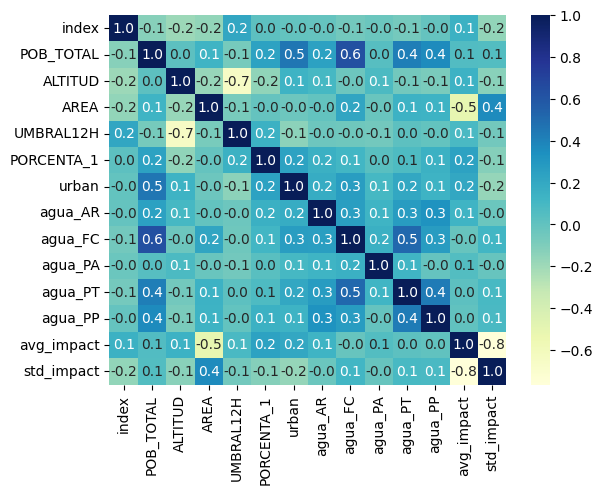

In [135]:
import seaborn as sns

# Vizualize correlation between features. Any highly correlated variable must be excluded from the analysis.
parcial_correlation_matrix = all_data.drop(['CVEGEO', 'NOM_ENT', 'NOM_MUN'], axis=1).corr()
sns.heatmap(parcial_correlation_matrix, cmap="YlGnBu", annot=True, fmt=".1f")


In [136]:
# Save results to csv
all_data_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/all_data_raquel.csv'
all_data.to_csv(all_data_path)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import hdbscan

# Example DataFrame (replace with your data)
df = all_data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 1: Reduce dimensions with UMAP
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
embedding = reducer.fit_transform(X_scaled)

# Step 2: Cluster with HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,          # Smallest meaningful cluster
    min_samples=3,              # Controls how conservative clustering is
    cluster_selection_epsilon=0.1,  # Distance threshold for merging
    gen_min_span_tree=True       # For stability
)
clusters = clusterer.fit_predict(embedding)

# Create a DataFrame for results
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    umap_df['UMAP1'],
    umap_df['UMAP2'],
    c=umap_df['Cluster'],
    cmap='Spectral',  # Color outliers (-1) differently
    alpha=0.7,
    s=50             # Marker size
)
plt.colorbar(scatter, label='Cluster')
plt.title('UMAP + HDBSCAN Clustering', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)
plt.grid(alpha=0.2)
plt.show()

# Print cluster counts
print("Cluster assignments:")
print(umap_df['Cluster'].value_counts())

ModuleNotFoundError: No module named 'hdbscan'